# Import

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress
import scipy
%matplotlib inline

# Read in data

data is in attrs and target

In [73]:
attrs = []
target = []
for xls in os.listdir('sample_data/'):
    data = pd.read_excel('sample_data/'+xls, header=None)

    output = data.iloc[-1,0]
    output = np.float32(output.split(':')[-1])
    data = data.iloc[0:-1]
    attrs.append(np.array(data))
    target.append(np.float32(output))

attrs = np.array(attrs, dtype=np.float32)
target = np.array(target, dtype=np.float32)

# Plot every column's average as x with final value as y

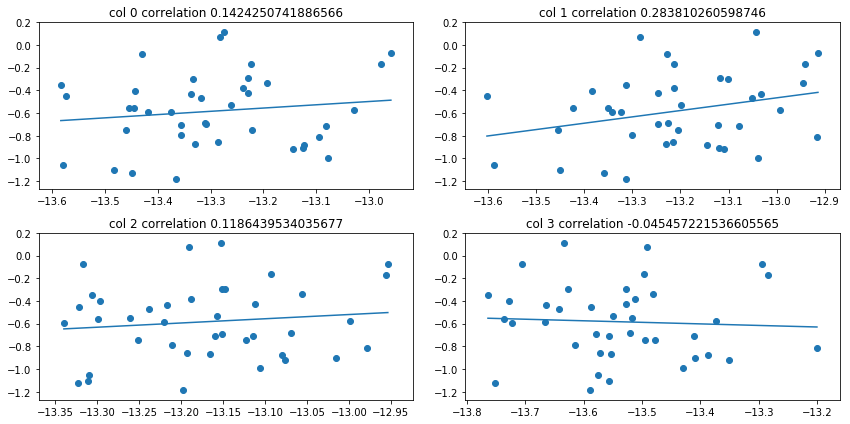

In [195]:
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2,2,i+1)
    x = np.mean(np.log(attrs[:,:,i]), axis=1).astype(np.float32)
    plt.scatter(x, np.log(target))
    reg = linregress(x,np.log(target))
    reg_x = np.linspace(min(x), max(x), 3)
    predict = reg_x*reg.slope + reg.intercept
    plt.plot(reg_x, predict)
    # plt.axis([ min(x), max(x), 0, 1.5])
    plt.title("col {} correlation {}".format(i,np.corrcoef(x, target)[0,1]))
plt.tight_layout()
# plt.savefig('feeling')

# Data preprocessing

## scaling

In [24]:
min_val = np.min(attrs, axis=None)
max_val = np.max(attrs, axis=None)

print('min = ', min_val)
print('max = ', max_val)

min =  1.3171675787247089e-09
max =  0.000854607292409486


In [25]:
scaled_attrs = (attrs-min_val)/(max_val-min_val) + 0.01

## save files

In [6]:
# for xls in os.listdir('sample_data/'):
#     data = pd.read_excel('sample_data/'+xls, header=None)

#     output = data.iloc[-1,0]
#     output = np.float32(output.split(':')[-1])
#     data.iloc[-1,0] = 0
#     data = (data-min)/(max-min) + 0.01
#     data.iloc[-1,0] = output
#     file_name = xls.split('.')[0]+'.csv'
#     data.to_csv('preprocessed_data/' + file_name)

# data with threshold

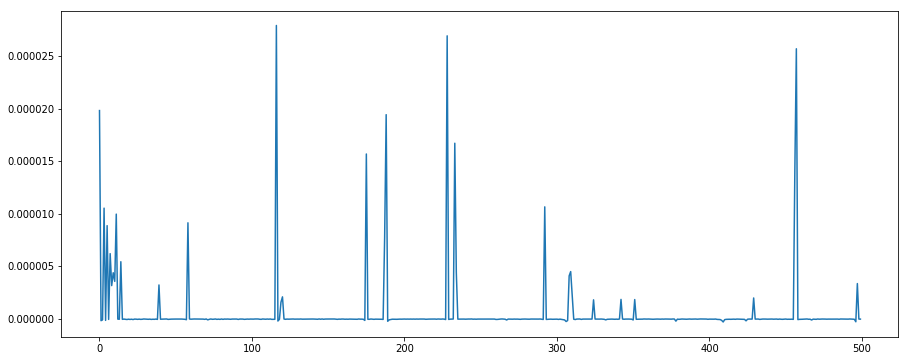

In [9]:
index = np.arange(0,7500,5) 
b = attrs[0,:,3]
b = [ a[i] if foo else -0.01*a[i] for i,foo in enumerate(b>0.000003)]
plt.figure(figsize=[15,6])
plt.plot(b[0:500])

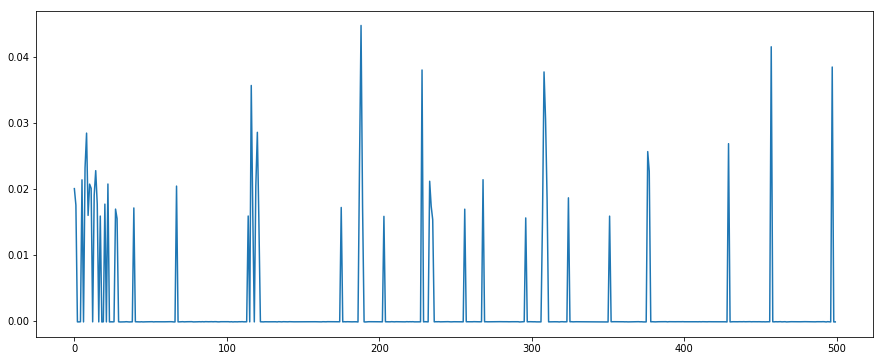

In [15]:
index = np.arange(0,7500,5)
b = scaled_attrs[0,:,2] 
b = [ b[i] if foo else -0.01*b[i] for i,foo in enumerate(b>0.015)]
plt.figure(figsize=[15,6])
plt.plot(b[0:500])

# 1.18 vs 0.36

In [26]:
select107 = np.sort(target)[-2]

In [27]:
sorted_target = np.sort(target)
middle_target = sorted_target[len(sorted_target)//2]

In [74]:
selection = np.logical_or(target == min(target), target == max(target), )
selection = np.logical_or(selection, middle_target == target)
selection = np.logical_or(selection, select107 == target)
cattrs = attrs[selection]
ctargets = target[selection]
num_selection = 4

In [ ]:
plt.scatter(cattrs[:,:,0].mean(axis=1), ctargets)
plt.axis([2.7e-06, 3.6e-06, 0, 1.2])

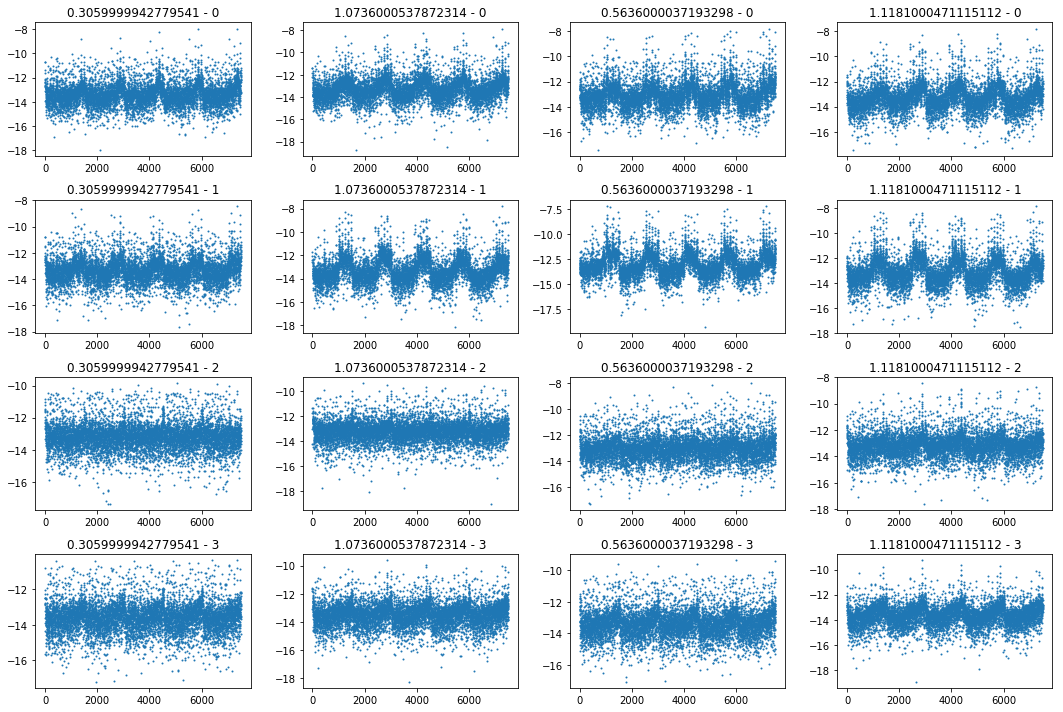

In [83]:
plt.figure(figsize=[15,10])
for i in range(4*num_selection):
    plt.subplot(4,num_selection,i+1)
    # plt.plot(np.log(cattrs[i%num_selection,:,i//num_selection]))
    plt.scatter(np.arange(len(cattrs[i%num_selection,:,i//num_selection])), np.log(cattrs[i%num_selection,:,i//num_selection]), s=1)
    plt.title("{} - {}".format(ctargets[i%num_selection], i//num_selection))
plt.tight_layout()

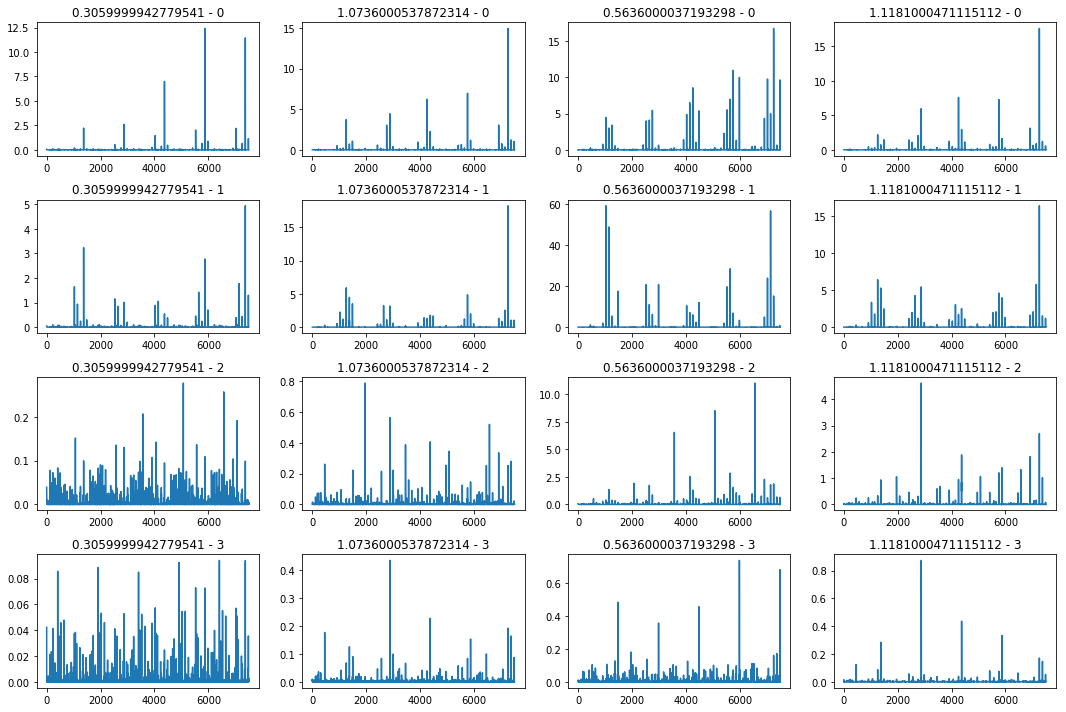

In [81]:
plt.figure(figsize=[15,10])
for i in range(4*num_selection):
    plt.subplot(4,num_selection,i+1)
    y = np.array(cattrs[i%num_selection,:,i//num_selection], dtype=np.float32)
    plt.plot(np.power(y,2)*1e8)
    plt.title("{} - {}".format(ctargets[i%num_selection], i//num_selection))
plt.tight_layout()

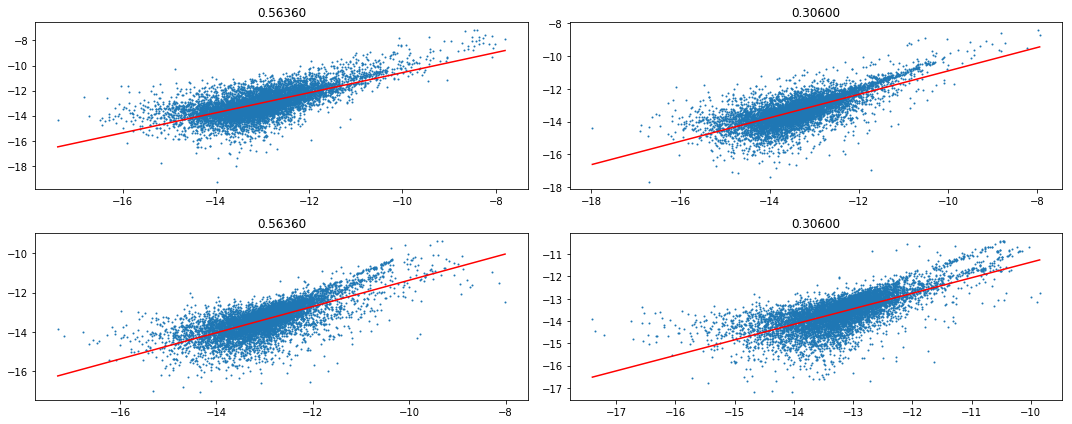

In [174]:
plt.figure(figsize=[15,6])

for i in range(4):
    plt.subplot(2,2,i+1)
    data_index = 2 if i%2 ==0 else 0
    compare_index = 0 if i//2 ==0 else 2
    x = np.log(cattrs[data_index,:,compare_index])
    y = np.log(cattrs[data_index,:,compare_index+1])
    plt.scatter(x, y, s=1)
    
    reg = linregress(x,y)
    reg_x = np.linspace(min(x), max(x), 3)
    predict = reg_x*reg.slope + reg.intercept
    plt.plot(reg_x, predict, 'r')
    
    plt.title("{:.5f}".format(ctargets[data_index]))

plt.tight_layout()

# Data smoothing

## segmented and averaged (750)

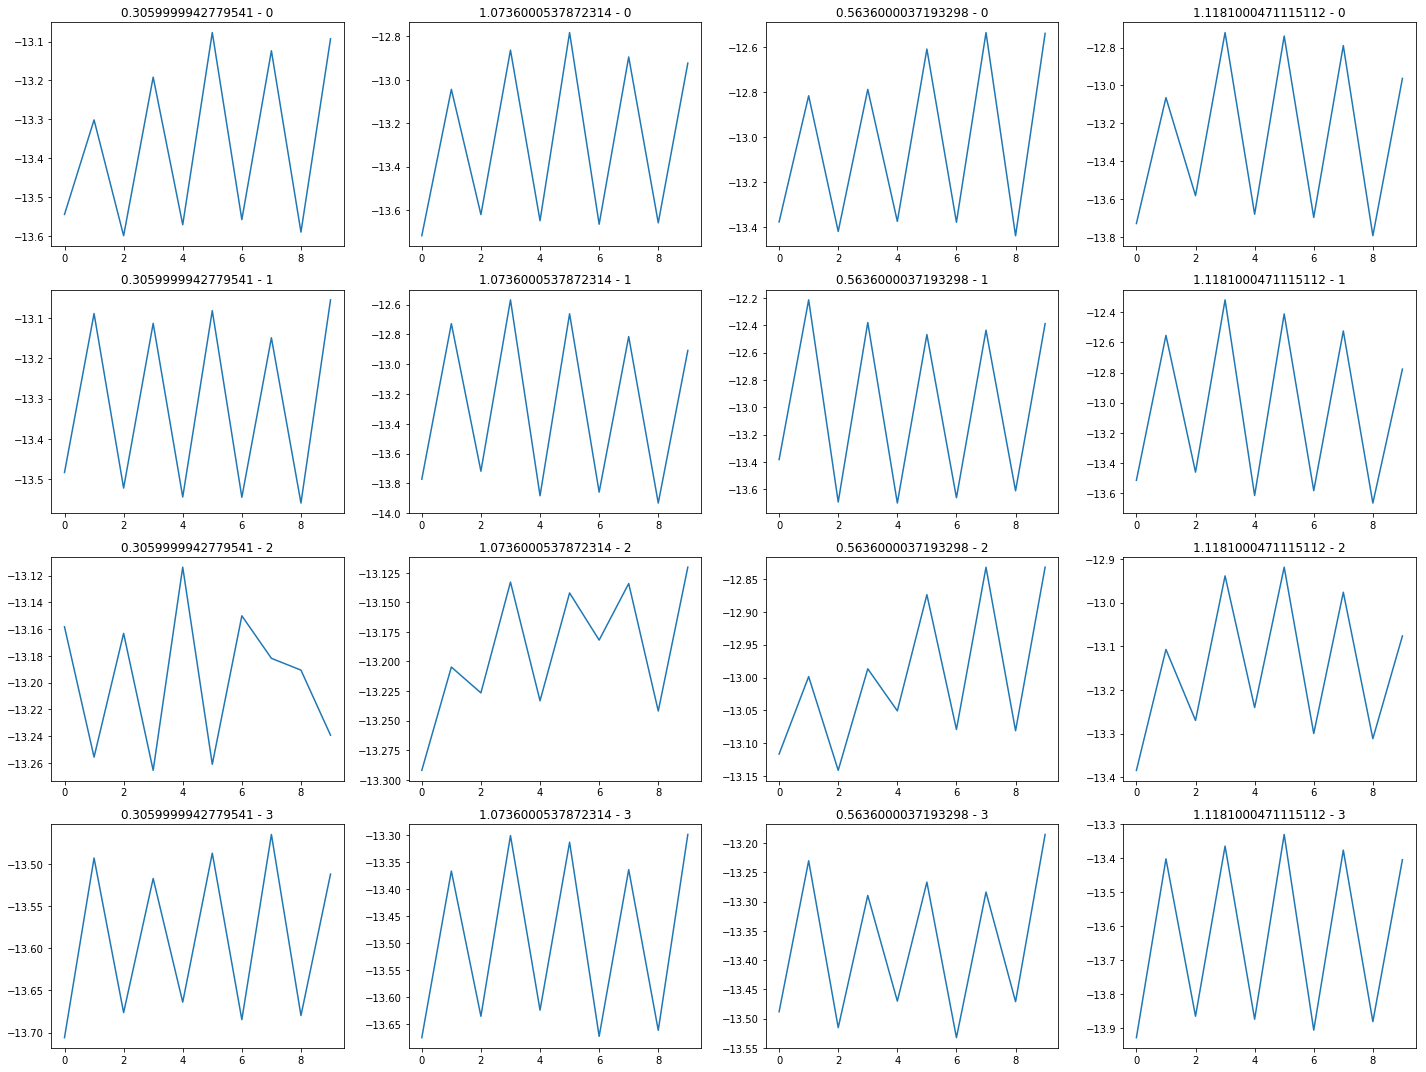

In [96]:
pooled = np.empty([7500//750])
plt.figure(figsize=[20,15])
for i in range(4*num_selection):
    plt.subplot(4,num_selection,i+1)
    y = np.array(cattrs[i%num_selection,:,i//num_selection], dtype=np.float32)
    y = np.log(y)
    for j, index in enumerate(range(0,7500,750)):
        pooled[j] = y[index:index+750].mean()
    plt.plot(pooled)
    plt.title("{} - {}".format(ctargets[i%num_selection], i//num_selection))
plt.tight_layout()

## segmented and averaged with small size

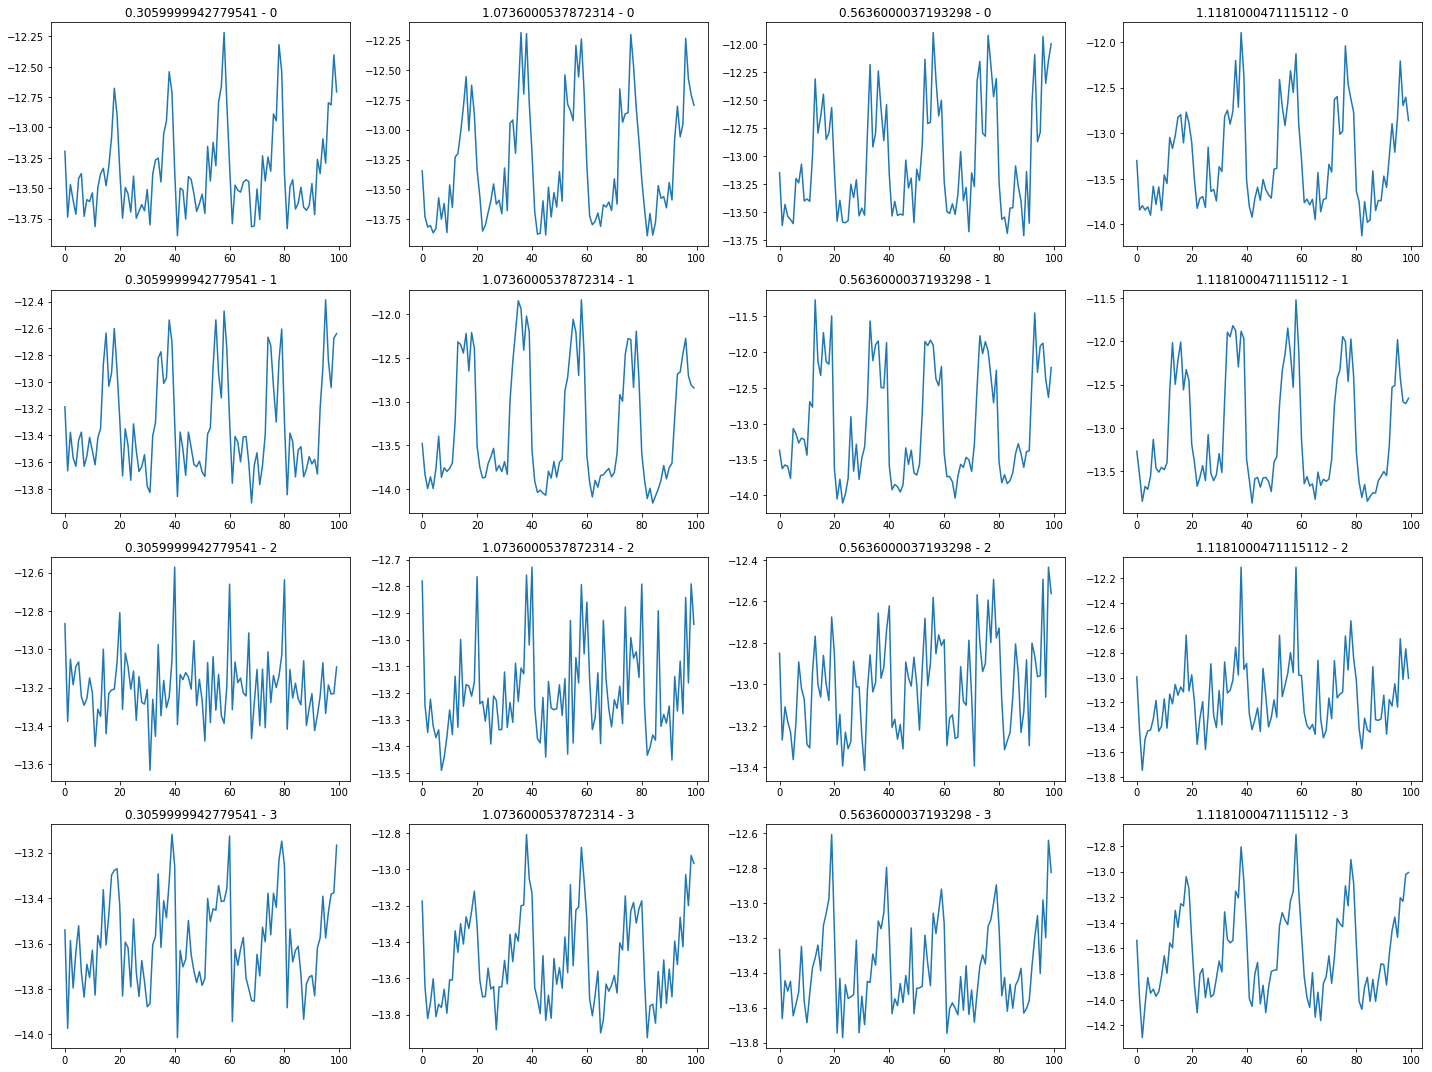

In [175]:
pool_size = 75
pooled = np.empty([7500//pool_size])
plt.figure(figsize=[20,15])
for i in range(4*num_selection):
    plt.subplot(4,num_selection,i+1)
    y = np.array(cattrs[i%num_selection,:,i//num_selection], dtype=np.float32)
    y = np.log(y)
    for j, index in enumerate(range(0,7500,pool_size)):
        pooled[j] = np.mean(np.sort(y[index:index+pool_size]))
    plt.plot(pooled)
    plt.title("{} - {}".format(ctargets[i%num_selection], i//num_selection))

plt.tight_layout()

# Column datas are log normal

Text(0.5,1,'data 0, column 0')

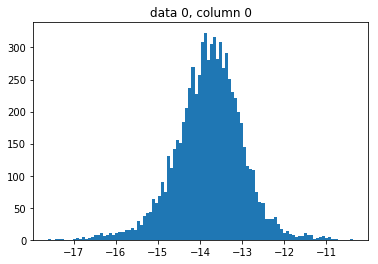

In [155]:
hist, bins = np.histogram(np.log(np.array(attrs[0,:,3], dtype=np.float32)), bins=100)
plt.bar(bins[:-1], hist, width=bins[1]-bins[0])
plt.title('data 0, column 0')

# Is target datas log normal ?

NormaltestResult(statistic=0.8108756357712295, pvalue=0.6666848603966209)
log後標準差大於2者： [1.0736 1.1181]


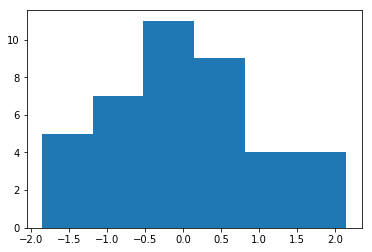

In [190]:
log_target = np.log(target)
print(scipy.stats.normaltest(log_target))
log_target_mean = np.mean(log_target)
log_target_std = np.std(log_target)
log_target_zscore = (log_target-log_target_mean)/log_target_std
_ = plt.hist(log_target_zscore, bins=6)
print('log後標準差大於2者：', target[abs(log_target_zscore)>2])

# normality of 40 data

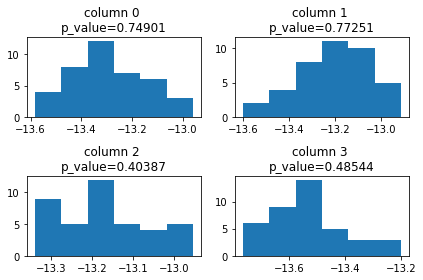

In [168]:
meaned_columns = np.mean(np.log(attrs), axis=1)
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.hist(meaned_columns[:,i], bins=6)
    norm_test = scipy.stats.normaltest(meaned_columns[:,i])
    plt.title("column {} \np_value={:.5f}".format(i, norm_test[1]))
plt.tight_layout()